In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
# It is used to print all the rows and columns inside the dataset

# pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [132]:
df= pd.read_csv(r'C:\Users\mabin\Desktop\DataScienceClassNotes\Career247_Capstone_Project\Fraud_Detection_Project\data\raw\cleaned_data_v1.csv')

In [133]:
df.head()

,transaction_id,customer_id,device_id,merchant_id,transaction_month,transaction_day,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud
0,1,1357,20937,720,1,18,18780.52,WALLET,0,Travel,0.243550,0.116606,7,6055.25,3,0,0,NONE,0.769328,1,2,0.069502,19,3,0,0
1,2,4095,29542,764,3,30,18955.06,CARD,0,Electronics,0.119761,0.030579,1,13366.74,5,0,1,OTP,0.468411,1,1,0.010010,2,5,1,0
2,3,3618,25236,671,1,4,10743.34,UPI,0,Fashion,0.565367,0.183770,0,7359.14,4,0,0,PIN,0.464356,0,1,0.118434,17,3,0,0
3,4,2755,29904,624,1,27,5054.75,CARD,0,Utilities,0.843842,0.717286,5,10923.57,6,0,0,PIN,0.635799,0,3,0.114947,16,5,1,0
4,5,2732,24151,501,2,20,14799.50,CARD,0,Gaming,0.202402,0.041616,11,6027.72,10,1,0,OTP,0.684301,2,0,0.014550,23,1,0,0


In [134]:
df['transaction_month'] = df['transaction_month'].replace({1: "Jan", 2: "Feb", 3: "Mar"})

In [135]:
mon_day = pd.pivot_table(
    data=df,
    index='transaction_day',
    columns=['transaction_month', 'is_fraud'],
    values='transaction_id',
    aggfunc='count',
    fill_value=0,
)

mon_day



transaction_month  Feb      Jan      Mar    
is_fraud             0   1    0   1    0   1
transaction_day                             
1                  509  55  524  46  483  67
2                  502  56  499  45  470  54
3                  488  55  486  56  495  48
4                  477  45  539  50  497  66
5                  484  64  531  60  527  59
6                  482  51  473  64  494  54
7                  458  57  489  68  460  55
8                  523  65  482  70  496  69
9                  485  36  489  64  495  68
10                 491  69  537  56  533  60
11                 504  58  516  54  462  66
12                 476  60  488  49  461  57
13                 496  50  464  53  485  60
14                 533  55  493  66  472  44
15                 559  50  417  35  493  58
16                 487  50  469  49  495  52
17                 499  61  496  53  476  57
18                 507  38  512  57  510  55
19                 494  65  505  47  514  50
20                 533  63  529  56  499  49
21                 516  52  485  60  518  58
22                 516  56  501  61  482  58
23                 535  50  509  48  507  55
24                 453  80  523  53  478  61
25                 490  50  497  59  478  60
26                 515  42  521  45  484  54
27                 499  62  505  56  552  66
28                 555  54  466  54  525  66
29                 516  53  545  50  525  45
30                   0   0  532  66  502  54
31                   0   0  500  51    0   0

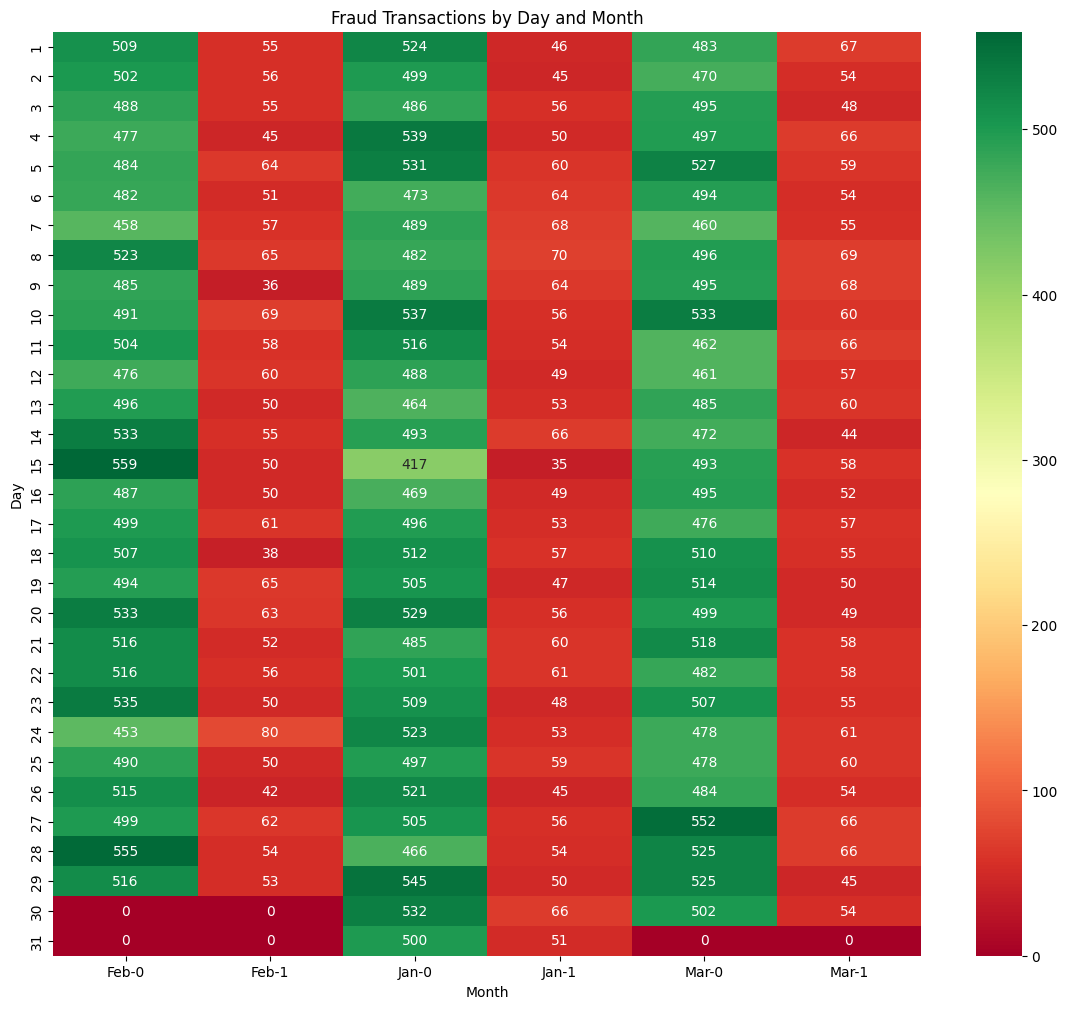

In [136]:
plt.figure(figsize=(14, 12))
sns.heatmap(mon_day, cmap="RdYlGn", annot=True, fmt="d")

plt.title("Fraud Transactions by Day and Month")
plt.xlabel("Month")
plt.ylabel("Day")
plt.show()

In [137]:
df.head()

,transaction_id,customer_id,device_id,merchant_id,transaction_month,transaction_day,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud
0,1,1357,20937,720,Jan,18,18780.52,WALLET,0,Travel,0.243550,0.116606,7,6055.25,3,0,0,NONE,0.769328,1,2,0.069502,19,3,0,0
1,2,4095,29542,764,Mar,30,18955.06,CARD,0,Electronics,0.119761,0.030579,1,13366.74,5,0,1,OTP,0.468411,1,1,0.010010,2,5,1,0
2,3,3618,25236,671,Jan,4,10743.34,UPI,0,Fashion,0.565367,0.183770,0,7359.14,4,0,0,PIN,0.464356,0,1,0.118434,17,3,0,0
3,4,2755,29904,624,Jan,27,5054.75,CARD,0,Utilities,0.843842,0.717286,5,10923.57,6,0,0,PIN,0.635799,0,3,0.114947,16,5,1,0
4,5,2732,24151,501,Feb,20,14799.50,CARD,0,Gaming,0.202402,0.041616,11,6027.72,10,1,0,OTP,0.684301,2,0,0.014550,23,1,0,0


In [138]:
mon_wek = pd.pivot_table(
    data=df,
    index='is_fraud',
    columns=['transaction_month','is_weekend' ],
    values='transaction_id',   # use an ID or any non-null column to count
    aggfunc='count',
    fill_value=0,
    margins= True,
    margins_name='Total'
)

mon_wek


transaction_month    Feb          Jan          Mar        Total
is_weekend             0     1      0     1      0     1       
is_fraud                                                       
0                  10673  3909  11618  3904  10417  4451  44972
1                   1146   456   1224   477   1216   509   5028
Total              11819  4365  12842  4381  11633  4960  50000

In [147]:
avg_amt = df.groupby('payment_method')['amount'].mean().round(2)
avg_amt

payment_method
CARD          10021.63
NETBANKING    10142.25
UPI            9991.95
WALLET         9998.93
Name: amount, dtype: float64

In [ ]:
avg_amt = pd.pivot_table(
    data=df,
    index='payment_method',
    columns=['transaction_month','is_weekend' ],
    values='transaction_id',   # use an ID or any non-null column to count
    aggfunc='count',
    fill_value=0,
    margins= True,
    margins_name='Total'
)

# Extracting Fraud Customers Data

In [139]:
fraud_df = df[df['is_fraud'] == 1]

In [140]:
fraud_df

,transaction_id,customer_id,device_id,merchant_id,transaction_month,transaction_day,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud
33,34,3218,27043,759,Jan,24,9071.98,NETBANKING,0,Fashion,0.589096,0.295387,4,12844.59,1,0,0,OTP,0.690134,2,4,0.101135,11,2,0,1
54,55,2991,26116,674,Mar,15,16954.67,CARD,0,Utilities,0.874328,0.759715,6,2651.51,8,0,0,NONE,0.515411,0,2,0.003775,1,4,0,1
55,56,1175,27759,792,Mar,27,10321.07,UPI,0,Fashion,0.033502,0.730067,2,5714.28,5,0,1,PIN,0.507805,2,2,0.011701,0,2,0,1
72,73,2851,28862,526,Feb,18,11133.54,CARD,0,Utilities,0.216937,0.219619,11,4591.64,5,0,1,OTP,0.741107,2,3,0.132140,7,6,1,1
78,79,3257,28254,698,Jan,8,3983.76,WALLET,0,Travel,0.813756,0.051227,8,7490.25,10,0,0,OTP,0.507807,2,1,0.071673,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49969,49970,4996,21547,699,Jan,1,19303.34,UPI,0,Fashion,0.736876,0.135400,0,1350.91,1,0,0,OTP,0.407341,1,2,0.087731,6,0,0,1
49976,49977,2872,28058,741,Jan,1,19694.92,UPI,1,Gaming,0.776022,0.948188,11,4315.56,4,0,0,3DS,0.483705,0,1,0.054651,17,0,0,1
49981,49982,4891,24247,603,Jan,12,3225.78,UPI,0,Utilities,0.783422,0.499513,11,13733.87,8,0,0,OTP,0.537763,0,4,0.081583,21,4,0,1
49982,49983,2517,25795,695,Jan,9,14891.98,UPI,0,Gaming,0.676020,0.909116,2,13606.66,8,1,0,OTP,0.649051,1,1,0.044564,21,1,0,1


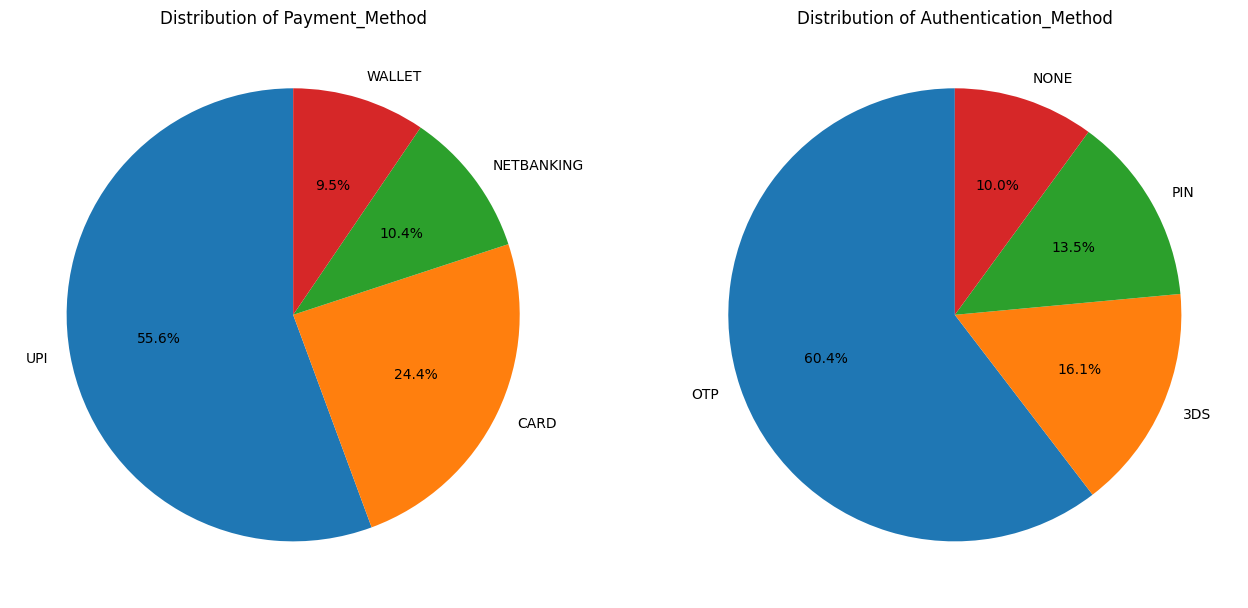

In [141]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for fraud payment_method and authentication_method
for idx, col in enumerate(['payment_method','authentication_method'], 1):
    ax = plt.subplot(2, 3, idx)
    fraud_df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {col.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### Observation

* Among fraudulent transactions, UPI is the most commonly used payment method (≈55.6%), followed by Card payments (≈24.4%).

* Net banking (≈10.4%) and Wallets (≈9.5%) contribute a smaller share of fraud cases.

* Regarding authentication, OTP-based verification is still the most used method in fraud cases (≈60.4%), followed by 3DS (≈16.1%) and PIN (≈13.5%).

* About 10% of fraudulent transactions occur without any authentication, which may indicate higher vulnerability and potential security gaps.

In [142]:
# get top 20 customers by fraud count
cust_fraud = fraud_df.groupby('customer_id').size().sort_values(ascending=False).head(20)
cust_fraud = cust_fraud.to_frame(name='count')
cust_fraud.index.name = 'customer_id'
fraud_count_id = cust_fraud.index
fraud_count_id

Index([1839, 3845, 1925, 1144, 1139, 3584, 2591, 3024, 1383, 2738, 2929, 4212,
       1655, 2762, 1654, 2888, 1692, 4191, 4066, 1913],
      dtype='int64', name='customer_id')

In [143]:
# The top 20 customers who have done fraud more than 4 times are

top_20_df = fraud_df[fraud_df['customer_id'].isin(fraud_count_id)]
top_20_df

,transaction_id,customer_id,device_id,merchant_id,transaction_month,transaction_day,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud
907,908,1692,22180,638,Feb,17,14594.73,CARD,0,Fashion,0.697532,0.185978,2,9947.57,2,0,0,NONE,0.947146,0,3,0.058469,6,5,1,1
1511,1512,1913,28392,571,Mar,27,10722.95,CARD,0,Utilities,0.513657,0.496436,4,11099.75,4,0,0,PIN,0.901819,2,3,0.089256,8,2,0,1
1655,1656,1925,27262,685,Jan,17,2614.62,CARD,0,Electronics,0.594318,0.380449,7,14335.91,1,0,1,OTP,0.716046,0,3,0.013426,15,2,0,1
2522,2523,1839,26523,732,Feb,29,1428.03,UPI,0,Grocery,0.714567,0.928874,4,10705.15,8,0,1,3DS,0.756412,0,0,0.108774,6,3,0,1
5245,5246,1913,27026,673,Jan,2,4043.45,UPI,0,Grocery,0.879229,0.041837,6,1537.59,2,0,0,OTP,0.429502,2,2,0.066719,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47655,47656,2762,20778,713,Jan,21,18683.19,WALLET,0,Fashion,0.652163,0.803467,10,8924.68,2,0,0,OTP,0.400265,1,1,0.011793,9,6,1,1
47724,47725,1383,28023,532,Mar,11,9549.14,UPI,0,Travel,0.497651,0.787613,0,5590.77,4,0,0,OTP,0.563892,2,4,0.062255,2,0,0,1
48465,48466,3024,21394,622,Feb,3,13325.85,UPI,0,Gaming,0.664900,0.329856,7,7253.04,6,0,0,OTP,0.675764,1,4,0.146575,13,5,1,1
49102,49103,3845,23025,538,Jan,23,15714.98,CARD,0,Travel,0.475056,0.928655,1,8886.13,7,0,0,OTP,0.596144,0,2,0.069997,0,1,0,1
